In [23]:
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torchvision import transforms
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader

# Repo imports
from utils.transforms import ResizeTransform
from noise.image import NoiseScheduler, mask_image
# import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def resize_and_scale(image, target):
    resize_transform = ResizeTransform(512, 512)
    image, target = resize_transform(image, target)
    image = transforms.ToTensor()(image)
    return image, target

In [14]:
coco_train = CocoDetection(root='coco/images/train2017',
                           annFile='coco/annotations/ann2017/captions_train2017.json',
                           transforms=resize_and_scale)

coco_val = CocoDetection(root='coco/images/val2017',
                         annFile='coco/annotations/ann2017/captions_val2017.json',
                         transforms=resize_and_scale)

loading annotations into memory...
Done (t=0.80s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [15]:
print('Number of samples in train:', len(coco_train))
print('Number of samples in validation:', len(coco_val))

img, target = coco_train[2]
print(target)
print(img.shape, target)

Number of samples in train: 118287
Number of samples in validation: 5000
[{'image_id': 30, 'id': 695774, 'caption': 'A flower vase is sitting on a porch stand.'}, {'image_id': 30, 'id': 696557, 'caption': 'White vase with different colored flowers sitting inside of it. '}, {'image_id': 30, 'id': 699041, 'caption': 'a white vase with many flowers on a stage'}, {'image_id': 30, 'id': 701216, 'caption': 'A white vase filled with different colored flowers.'}, {'image_id': 30, 'id': 702428, 'caption': 'A vase with red and white flowers outside on a sunny day.'}]
torch.Size([3, 512, 512]) [{'image_id': 30, 'id': 695774, 'caption': 'A flower vase is sitting on a porch stand.'}, {'image_id': 30, 'id': 696557, 'caption': 'White vase with different colored flowers sitting inside of it. '}, {'image_id': 30, 'id': 699041, 'caption': 'a white vase with many flowers on a stage'}, {'image_id': 30, 'id': 701216, 'caption': 'A white vase filled with different colored flowers.'}, {'image_id': 30, 'id': 

In [16]:
def show_image(img_tensor, annotation, instances=False):
    fig, ax = plt.subplots(1)
    ax.imshow(img_tensor.permute(1, 2, 0))

    for ann in annotation:
        if instances:
            bbox = ann['bbox']
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
        else:
            print(ann["caption"])

    plt.show()

A flower vase is sitting on a porch stand.
White vase with different colored flowers sitting inside of it. 
a white vase with many flowers on a stage
A white vase filled with different colored flowers.
A vase with red and white flowers outside on a sunny day.


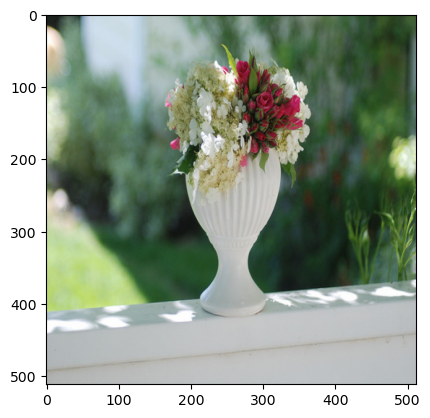

In [18]:
show_image(img, target)

In [24]:
train_loader = DataLoader(coco_train, batch_size=16, shuffle=True)
val_loader = DataLoader(coco_val, batch_size=16, shuffle=False)

A flower vase is sitting on a porch stand.
White vase with different colored flowers sitting inside of it. 
a white vase with many flowers on a stage
A white vase filled with different colored flowers.
A vase with red and white flowers outside on a sunny day.


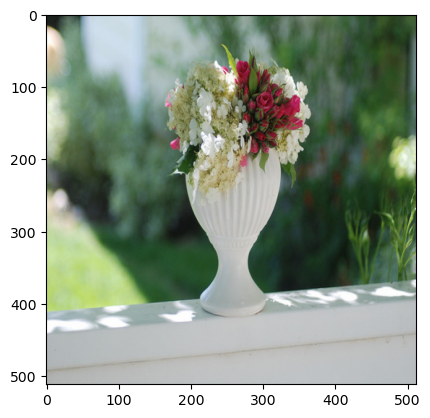

A flower vase is sitting on a porch stand.
White vase with different colored flowers sitting inside of it. 
a white vase with many flowers on a stage
A white vase filled with different colored flowers.
A vase with red and white flowers outside on a sunny day.


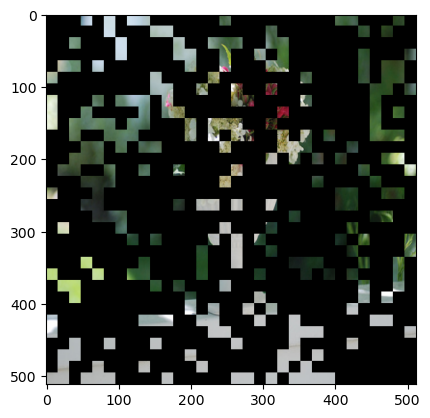

In [25]:
show_image(img, target)
noised_img, mask = mask_image(patch_size=16, image_tensor=img)
show_image(noised_img, target)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


A flower vase is sitting on a porch stand.
White vase with different colored flowers sitting inside of it. 
a white vase with many flowers on a stage
A white vase filled with different colored flowers.
A vase with red and white flowers outside on a sunny day.


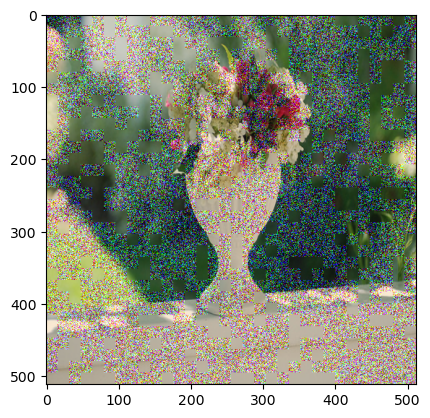

In [27]:
test_time = torch.tensor([20,40,60])
inverted = ~mask.bool()
output = NoiseScheduler(100).add_noise(img,test_time, mask=inverted)
show_image(output, target)
